In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import scipy as sp
import scipy.optimize as op
from scipy.interpolate import UnivariateSpline
import copy

# Adding library directory to python search path|
import sys
import git
repo = git.Repo('.', search_parent_directories=True)
library_dir = repo.working_tree_dir + '/lib'
sys.path.insert(0, library_dir)

import miptlib as mipt

In [45]:
class setup:
    input_power = 0.035 # mW
    input_db = -14.43 # dBmW

def t_coeff(n):
    '''
    Returns t-test coefficient
    n -- number of points
    '''
    assert n > 0, 'n must be positive'
    __students = [12.7062, 4.3027, 3.1824, 2.7764, 2.5706, 2.4469, 2.3646, 2.3060, 2.2622]
    if n < len(__students):
        return __students[n-1]
    else:
        return 2

## 2. Spotaneous amplified emission

In [46]:
sr = 28

spontan = [
    [0.96,  0,  pd.read_csv('data/spontaneous0.csv', skiprows=sr).iloc[:, 0]],
    [1.93,  3,  pd.read_csv('data/spontaneous1.csv', skiprows=sr).iloc[:, 0]],
    [3.93,  6,  pd.read_csv('data/spontaneous2.csv', skiprows=sr).iloc[:, 0]],
    [7.96,  9,  pd.read_csv('data/spontaneous3.csv', skiprows=sr).iloc[:, 0]],
    [15.98, 12, pd.read_csv('data/spontaneous4.csv', skiprows=sr).iloc[:, 0]]
]

print(len(spontan[0][2].index.values))
print(len(spontan[0][2].values))

851
851


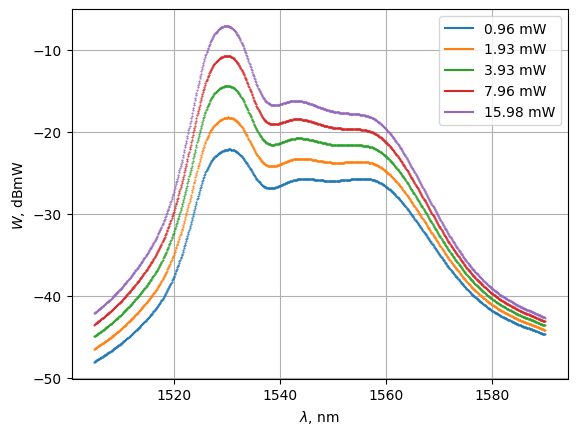

In [47]:
for series in spontan:
    mipt.plot(series[2].index.values, series[2].values, func=None, marker_size=1, label=str(series[0]) + ' mW')

plt.grid()
plt.legend()

plt.ylabel(r"$W$, dBmW")
plt.xlabel(r"$\lambda$, nm")

plt.savefig("gen/spontaneous.pdf")


## 3. EDFA amplifier coefficient

In [57]:
sr = 28

induced = [
    [0.94, 0, pd.read_csv('data/ind0.csv', skiprows=sr).iloc[:, 0]],
    [1.55, 2, pd.read_csv('data/ind1.csv', skiprows=sr).iloc[:, 0]],
    [2.53, 4, pd.read_csv('data/ind2.csv', skiprows=sr).iloc[:, 0]],
    [3.95, 6, pd.read_csv('data/ind3.csv', skiprows=sr).iloc[:, 0]],
    [6.37, 8, pd.read_csv('data/ind4.csv', skiprows=sr).iloc[:, 0]],
    [9.95, 10, pd.read_csv('data/ind5.csv', skiprows=sr).iloc[:, 0]],
    [15.95, 12, pd.read_csv('data/ind6.csv', skiprows=sr).iloc[:, 0]],
    [25.16, 14, pd.read_csv('data/ind7.csv', skiprows=sr).iloc[:, 0]],
    [39.98, 16, pd.read_csv('data/ind8.csv', skiprows=sr).iloc[:, 0]],
]

input = [
    pd.read_csv('data/input_before.csv', skiprows=sr).iloc[:, 0],
    pd.read_csv('data/input_after.csv', skiprows=sr).iloc[:, 0]
]

input

[1505.0   -62.542
 1505.1   -61.831
 1505.2   -61.581
 1505.3   -61.636
 1505.4   -61.996
            ...  
 1589.6   -68.673
 1589.7   -70.462
 1589.8   -66.898
 1589.9   -68.718
 1590.0   -71.384
 Name: [TRACE DATA], Length: 851, dtype: float64,
 1505.0   -61.445
 1505.1   -61.199
 1505.2   -61.470
 1505.3   -61.183
 1505.4   -61.391
            ...  
 1589.6   -61.127
 1589.7   -62.319
 1589.8   -61.809
 1589.9   -62.837
 1590.0   -62.561
 Name: [TRACE DATA], Length: 851, dtype: float64]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


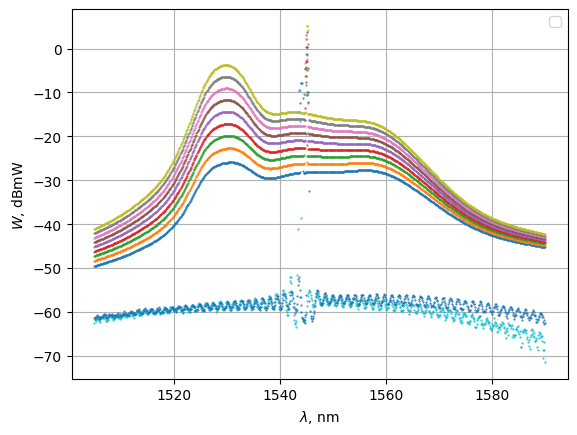

In [65]:
from scipy.interpolate import CubicSpline

i = 0

for series in induced:
    x = series[2].index.values
    y = series[2].values

    poly = CubicSpline(x, y)
    lin = np.linspace(min(x), max(x), 1000)
    # plt.plot(lin, poly(lin), color='C' + str(i))
    mipt.plot(x, y, color='C' + str(i), func=None, marker_size=1)
    i += 1

for series in input:
    x = series.index.values
    y = series.values

    poly = CubicSpline(x, y)
    lin = np.linspace(min(x), max(x), 1000)
    # plt.plot(lin, poly(lin), color='C' + str(i))
    mipt.plot(x, y, color='C' + str(i), func=None, marker_size=1)
    i += 1

plt.grid()
plt.legend()

plt.ylabel(r"$W$, dBmW")
plt.xlabel(r"$\lambda$, nm")

plt.savefig("gen/induced.pdf")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[392]
[1544.2]
[5.81857932]
[400]
[1545.]
[5.94251346]
[399]
[1544.9]
[21.61616162]
[401]
[1545.1]
[185.77884615]
[401]
[1545.1]
[347.58694489]
[402]
[1545.2]
[358.09363331]
[401]
[1545.1]
[363.54121622]
[402]
[1545.2]
[367.84484461]
[402]
[1545.2]
[368.10003525]


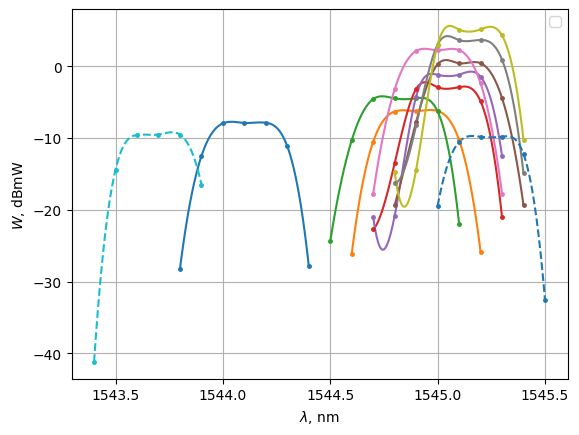

In [63]:
# def find_peak(x, y, slope):
#     assert len(x) == len(y)

#     start = 0
#     end = 0

#     in_peak = False
#     for indx in range(0, len(x)):
#         k = (y[indx + 1] - y[indx]) / (x[indx + 1] - x[indx])

#         if (k > slope and not in_peak)
#             start = indx
#             in_peak = True
#         else if (k < -slope and in_peak)
#             end = indx - 1
#         if (not in_peak):
#             if ((y[indx] - y[indx + 1]) / (x[indx] - x[indx + 1]) < slope):
#                 start = indx
#                 in_peak = True
#         else if (in_peak):
#             if ((y[indx] - y[indx - 1]) / (x[indx] - x[indx - 1]) < slope):
#                 end = indx
#                 return start, end

#     assert 0, 'Peak was not found'

from scipy.signal import find_peaks, peak_widths

i = 0
for series in induced:
    x = series[2].index.values
    y = series[2].values

    peaks, _ = find_peaks(y, prominence=20)
    print(peaks)
    print(x[peaks])
    width = peak_widths(y, peaks, rel_height=0.5)
    print(width[0])# * (x[1] - x[0]))
    m = peaks[0]
    mipt.plot(x[m-4:m+3], y[m-4:m+3], func=CubicSpline, marker_size=5, color="C" + str(i))
    # plt.axvline(x=x[m], color="C" + str(i), ls=':')
    i += 1

for series in input:
    x = series.index.values
    y = series.values

    peaks, _ = find_peaks(y, prominence=20)

    m = peaks[0]
    mipt.plot(x[m-3:m+3], y[m-3:m+3], func=CubicSpline, marker_size=5, color="C" + str(i), linestyle='dashed')
    # plt.axvline(x=x[m], color="C" + str(i), ls=':')
    i+=1

plt.grid()
plt.legend()

plt.ylabel(r"$W$, dBmW")
plt.xlabel(r"$\lambda$, nm")

plt.savefig("gen/induced_enlarged.pdf")


diff: 5
shift: 1
add: 387, orig: 391
min: -18.754
shift: 2
add: 387, orig: 390
min: -18.649
shift: 3
add: 387, orig: 389
min: -13.816
shift: 4
add: 387, orig: 388
min: 1.6160000000000005
shift: 5
add: 387, orig: 387
min: -11.361999999999998
shift: 6
add: 387, orig: 386
min: -18.314
shift: 7
add: 387, orig: 385
min: -18.737000000000002
shift: 8
add: 387, orig: 384
min: -18.754
shift: 9
add: 387, orig: 383
min: -18.748
add: 387, orig: 388
diff: 13
shift: 9
add: 387, orig: 391


ValueError: operands could not be broadcast together with shapes (842,) (838,) 

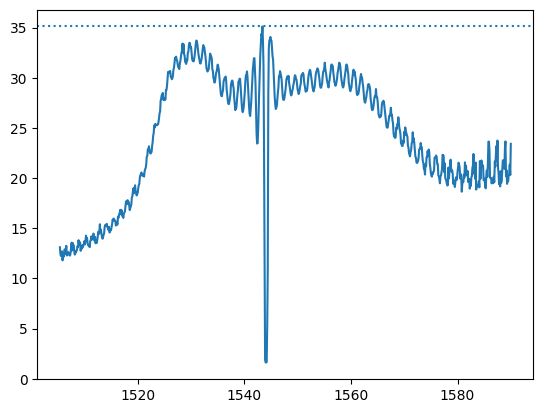

In [36]:
from scipy.interpolate import CubicSpline

def variate(x, y, addend, diff):
    for i in range(-4, 5):
        print('shift: {}'.format(diff + i))
        tmpaddend = addend[:-diff - i]
        tmpy = y[diff + i:]
        tmpx = x[diff + i:]
        print('add: {}, orig: {}'.format(np.argmax(tmpaddend), np.argmax(tmpy)))
        tmpy = tmpy - tmpaddend
        print('min: {}'.format(min(tmpy)))



output = []

addend = input[0].values
addend_index = np.argmax(addend)

for series in induced:
    x = series[2].index.values
    y = series[2].values
    # p = plt.plot(x, y, label=str(series[0]) + ' mW')

    # print(y)
    y_index = np.argmax(y)
    diff = y_index - addend_index
    print('diff: {}'.format(diff))

    variate(x, y, addend, diff)
    addend = addend[:-4 - i]
    y = y[4 + i:]
    x = x[4 + i:]
    print('add: {}, orig: {}'.format(np.argmax(addend), np.argmax(y)))
    y = y - addend

    # poly = CubicSpline(x, y)
    # lin = np.linspace(min(x), max(x), 1000)
    p = plt.plot(x, y, label=str(series[0]) + ' mW')
    plt.axhline(y=max(y), c=p[-1].get_color(), ls=':')
    output.append(max(y))
    # mipt.plot(series[2].index.values, series[2].values, func=None, marker_size=1, label=str(series[0]) + ' mW')


for series in input:
    x = series.index.values
    y = series.values
    poly = CubicSpline(x, y)
    lin = np.linspace(min(x), max(x), 1000)
    # p = plt.plot(lin, poly(lin), label='input')
    # plt.axhline(y=max(y), c=p[-1].get_color(), ls='-.')


plt.grid()
plt.legend()

plt.ylabel(r"$W$, dBmW")
plt.xlabel(r"$\lambda$, nm")

plt.savefig("gen/diff.pdf")
output


## 4. Output on input and pumping current

In [14]:
data = mipt.read_excel('data/data.xlsx', usecols=['D', 'E', 'F', 'G', 'H', 'I'], header=(0, 1)).dropna(how='all')
data

xls = {
    "I = 100 mA" : "100",
    "I = 110 mA" : "110",
    "I = 90 mA" : "90",

    "input, mW" : "in",
    "output, mW" : "out"
}

data = mipt.map_excel(data, xls)
data

100          110            90      
       in   out     in    out     in   out
0   0.259  9.85  0.107  11.40  0.254  6.95
1   0.200  9.58  0.100  11.34  0.220  6.83
2   0.180  9.45  0.090  11.00  0.190  6.60
3   0.230  9.75  0.080  10.64  0.170  6.50
4   0.160  9.32  0.070  10.25  0.150  6.37
5   0.140  9.14  0.060   9.70  0.120  6.20
6   0.120  8.93  0.050   8.70  0.100  5.97
7   0.100  8.53  0.045   8.05  0.090  5.80
8   0.080  8.10  0.040   7.08  0.080  5.60
9   0.060  7.25  0.035   5.27  0.070  5.38
10  0.050  6.50    NaN    NaN  0.060  5.00
11  0.040  5.26    NaN    NaN  0.054  4.80
12  0.034  3.42    NaN    NaN  0.050  4.45
13    NaN   NaN    NaN    NaN  0.045  4.06
14    NaN   NaN    NaN    NaN  0.040  3.60
15    NaN   NaN    NaN    NaN  0.035  2.65
16    NaN   NaN    NaN    NaN  0.034  2.37

/home/futherus/.local/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/futherus/.local/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/home/futherus/.local/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/futherus/.local/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


(0     0.254
 1     0.220
 2     0.190
 3     0.170
 4     0.150
 5     0.120
 6     0.100
 7     0.090
 8     0.080
 9     0.070
 10    0.060
 11    0.054
 12    0.050
 13    0.045
 14    0.040
 15    0.035
 16    0.034
 dtype: float64,
 0     6.95
 1     6.83
 2     6.60
 3     6.50
 4     6.37
 5     6.20
 6     5.97
 7     5.80
 8     5.60
 9     5.38
 10    5.00
 11    4.80
 12    4.45
 13    4.06
 14    3.60
 15    2.65
 16    2.37
 dtype: float64,
 None)

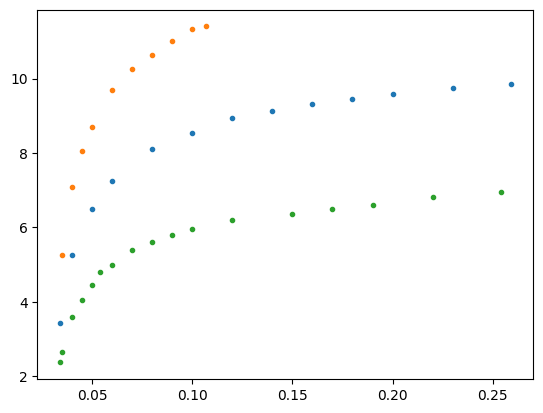

In [15]:


mipt.plot(data["100"]["in"], data["100"]["out"], func=None)
mipt.plot(data["110"]["in"], data["110"]["out"], func=None)
mipt.plot(data["90"]["in"], data["90"]["out"], func=None)


In [52]:
U_aon = data['U06_on']
U_aoff = data['U06_off']
U_bon = data['U11_on']
U_boff = data['U11_off']

G = lambda x: x[0] / x[1]

n = len(U_aon) + 2

errors = np.full(len(U_aon), setup.osc_err)
G_on = G([U_aon, U_bon])
G_on_err, grad = mipt.errcalc(G, [U_aon, U_bon], [errors, errors])

errors = np.full(len(U_aoff), setup.osc_err)
G_off = G([U_aoff, U_boff])
G_off_err, grad = mipt.errcalc(G, [U_aoff, U_boff], [errors, errors])

G_res = G([G_on.mean(), G_off.mean()])
G_on_err = (G_on_err.mean()) / (n**0.5)
G_off_err = (G_off_err.mean()) / (n**0.5)
G_res_err, grad = mipt.errcalc(G, [G_on.mean(), G_off.mean()], [G_on_err, G_off_err])
G_res_err

print('G = {} \pm {}'.format(G_res, G_res_err))

G = 1.0293211239630093 \pm [0.00576072]


In [53]:
data = mipt.read_excel('data/451.xlsx', usecols=['E', 'F'], header=(0)).dropna(how='all')
data

,theta,U
0,0,0.45
1,10,1.16
2,20,2.05
3,30,2.88
4,40,3.54
5,50,4.00
6,60,4.27
7,70,4.50
8,80,4.14
9,90,4.10


a, phi, nu: [  0.97414693 -70.32983769   0.9982854 ]
errors: [0.01187187 1.11657261 0.00570609]


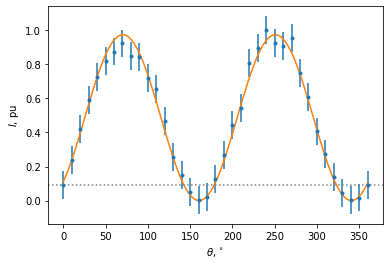

In [97]:
from scipy.optimize import curve_fit

theta = np.array(data['theta'])
u = np.array(data['U']) / np.array(data['U']).max()

mipt.plot(theta, u, func = None, yerr=np.full(len(u), 4 * setup.osc_err/ np.array(data['U']).max()) )

# Find u = a * cos^2(theta + phi)
def cosine(x, a, phi, nu):
    return a * np.cos(nu * np.radians(x) + np.radians(phi))**2

popt, pcov = curve_fit(cosine, theta, u)

t = np.linspace(theta.min(), theta.max(), 100)
plt.plot(t, cosine(t, popt[0], popt[1], popt[2]))

plt.axhline(y=u[0], c='grey', ls=':')

plt.ylabel(r"$I$, pu")
plt.xlabel(r"$\theta, ^\circ$")

plt.savefig("gen/cosine.pdf")

print("a, phi, nu: {}".format(popt))
print("errors: {}".format(np.sqrt(np.diag(pcov))))